## Chargement et préparation des données


In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

from scripts.features.processing import filter_and_analyze_dataset
from scripts.visualization.data_quality_viz import plot_data_quality_dashboard

df = pd.read_csv('../data/en.openfoodfacts.org.products.csv', 
                 sep='\t',
                 encoding='utf-8',
                 low_memory=False,
                 on_bad_lines='skip',
                 nrows=500000)

Module de visualisation non disponible
Colonnes numériques : 13
Colonnes ordinales : 1
Colonnes nominales : 1
Colonnes supprimées : 191
Colonnes optimisées : 3

Variables supprimées pour cause de forte corrélation:
- sodium_100g


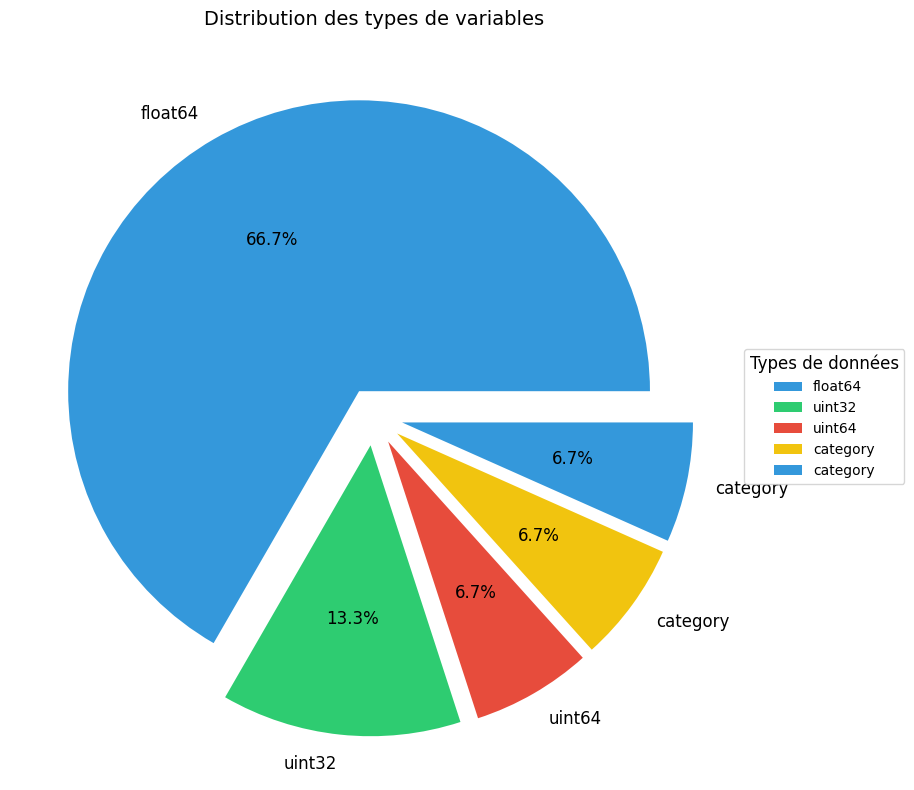

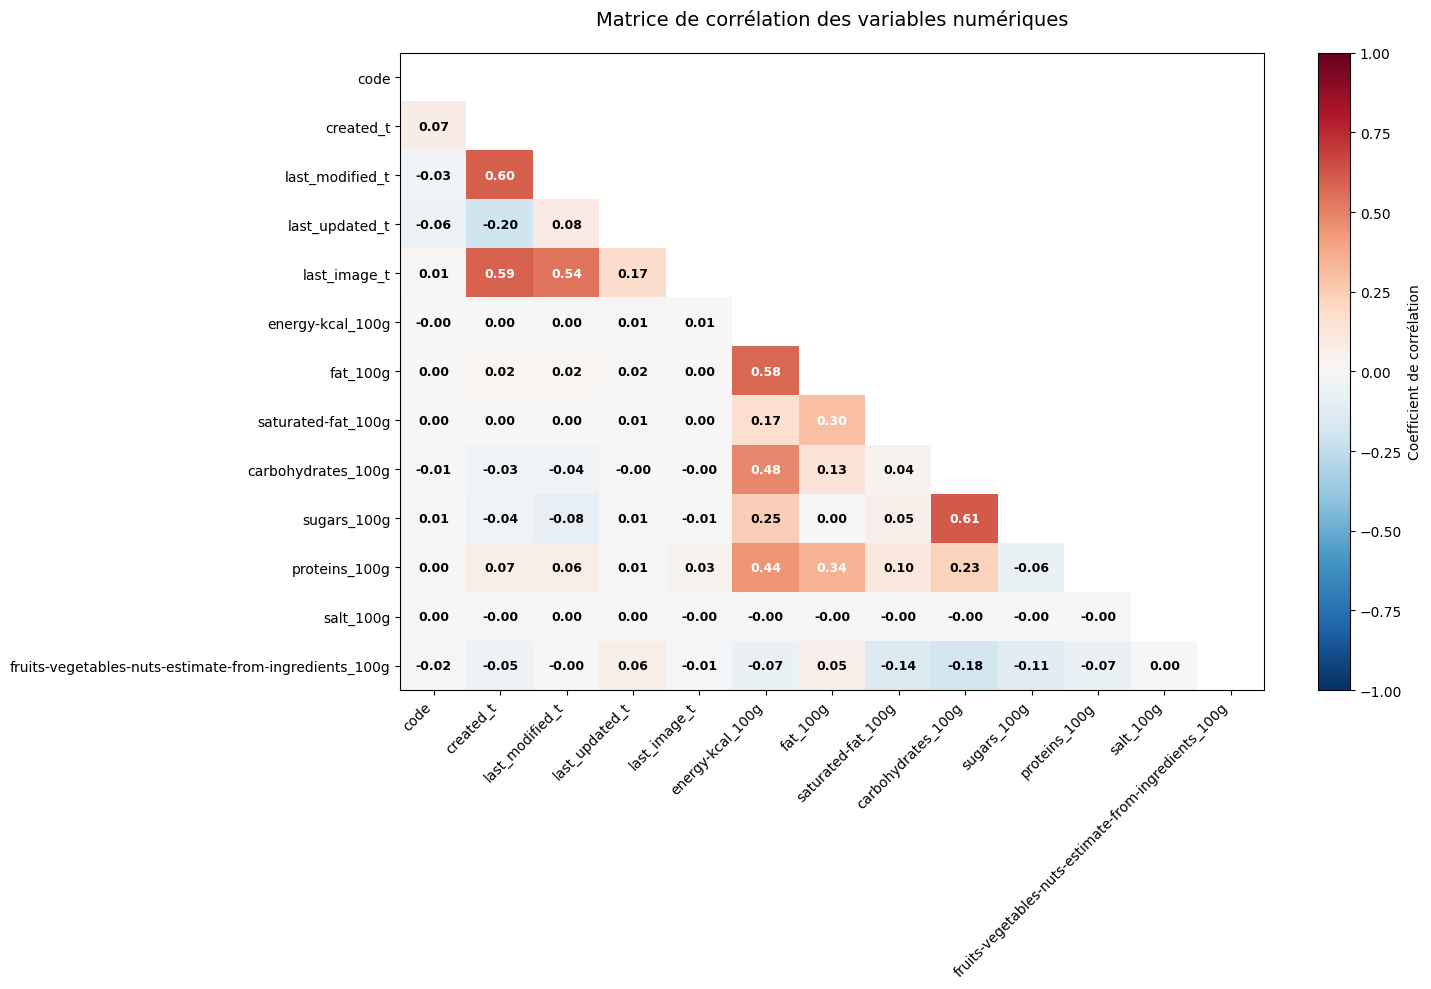

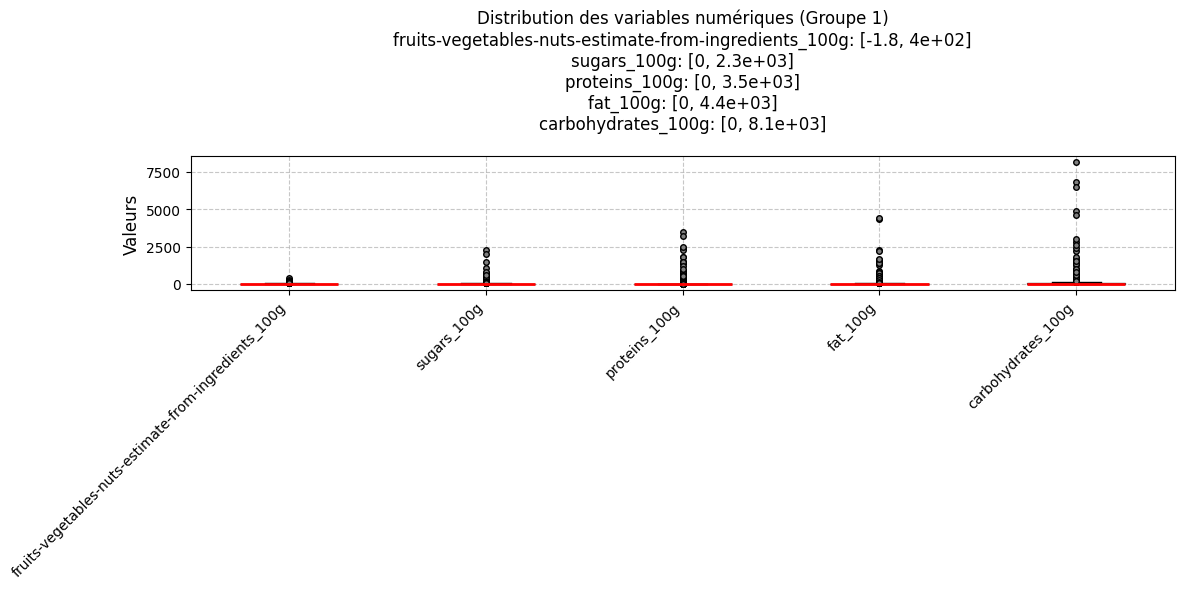


Statistiques détaillées pour le groupe 1

fruits-vegetables-nuts-estimate-from-ingredients_100g:
  Moyenne: 19
  Écart-type: 31
  Min: -1.8
  Max: 4e+02
  Nombre de valeurs non-nulles: 256806

sugars_100g:
  Moyenne: 15
  Écart-type: 22
  Min: 0
  Max: 2.3e+03
  Nombre de valeurs non-nulles: 405622

proteins_100g:
  Moyenne: 7.7
  Écart-type: 16
  Min: 0
  Max: 3.5e+03
  Nombre de valeurs non-nulles: 425103

fat_100g:
  Moyenne: 12
  Écart-type: 21
  Min: 0
  Max: 4.4e+03
  Nombre de valeurs non-nulles: 424520

carbohydrates_100g:
  Moyenne: 32
  Écart-type: 38
  Min: 0
  Max: 8.1e+03
  Nombre de valeurs non-nulles: 425895


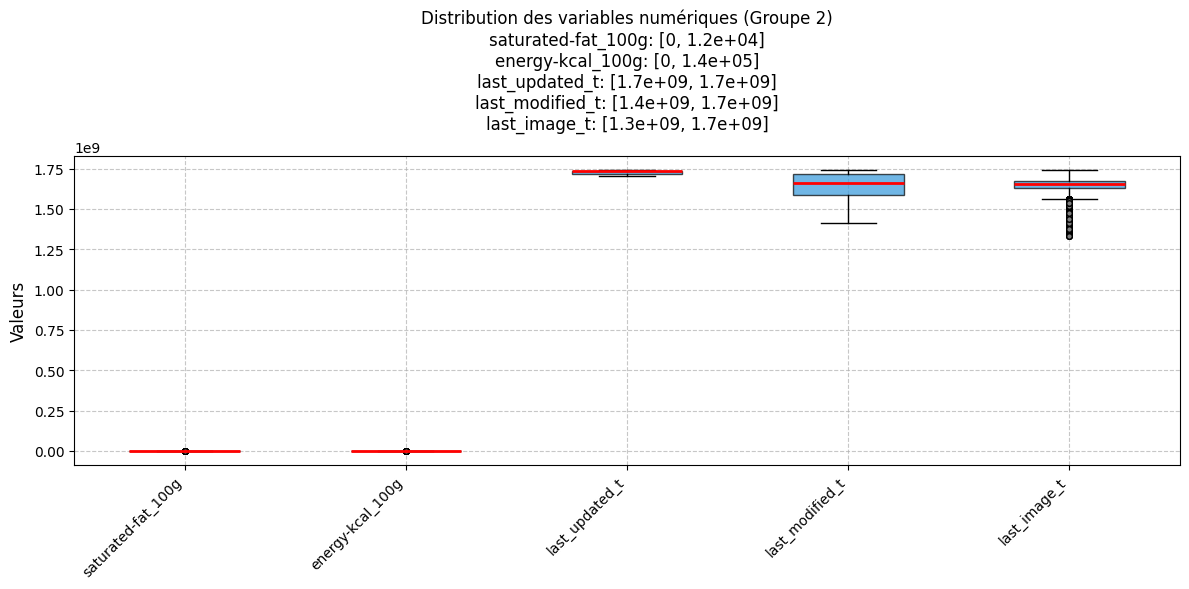


Statistiques détaillées pour le groupe 2

saturated-fat_100g:
  Moyenne: 4.5
  Écart-type: 22
  Min: 0
  Max: 1.2e+04
  Nombre de valeurs non-nulles: 387059

energy-kcal_100g:
  Moyenne: 2.6e+02
  Écart-type: 3.4e+02
  Min: 0
  Max: 1.4e+05
  Nombre de valeurs non-nulles: 426708

last_updated_t:
  Moyenne: 1.7e+09
  Écart-type: 1.2e+07
  Min: 1.7e+09
  Max: 1.7e+09
  Nombre de valeurs non-nulles: 499999

last_modified_t:
  Moyenne: 1.7e+09
  Écart-type: 6e+07
  Min: 1.4e+09
  Max: 1.7e+09
  Nombre de valeurs non-nulles: 500000

last_image_t:
  Moyenne: 1.7e+09
  Écart-type: 4.8e+07
  Min: 1.3e+09
  Max: 1.7e+09
  Nombre de valeurs non-nulles: 277085


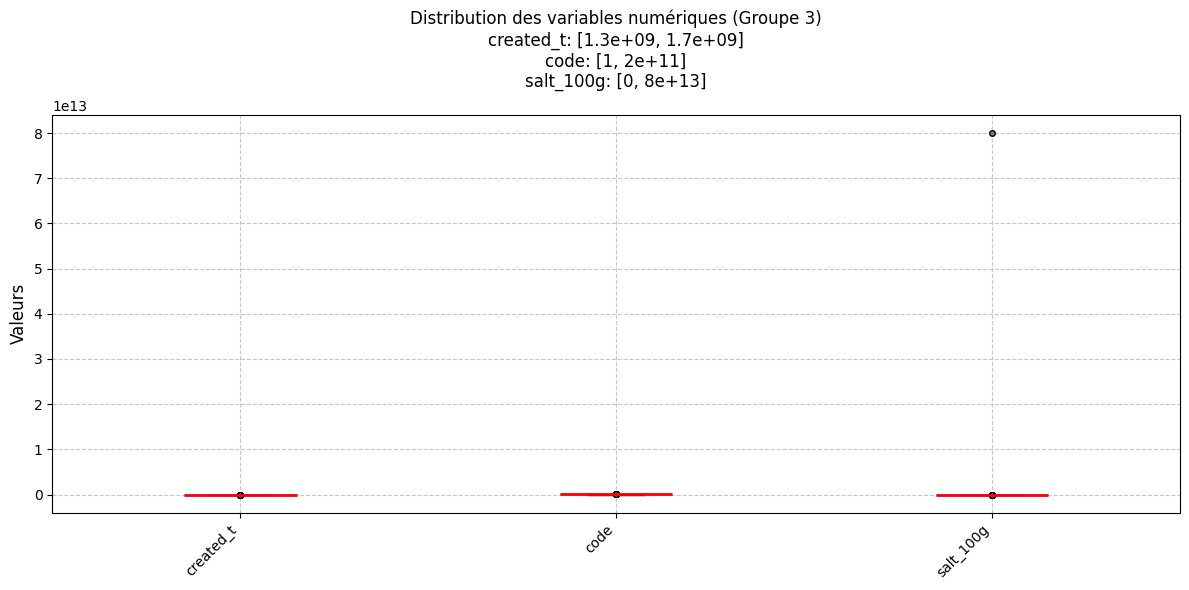


Statistiques détaillées pour le groupe 3

created_t:
  Moyenne: 1.6e+09
  Écart-type: 7.8e+07
  Min: 1.3e+09
  Max: 1.7e+09
  Nombre de valeurs non-nulles: 500000

code:
  Moyenne: 5.2e+10
  Écart-type: 3.8e+10
  Min: 1
  Max: 2e+11
  Nombre de valeurs non-nulles: 500000

salt_100g:
  Moyenne: 2.1e+08
  Écart-type: 1.3e+11
  Min: 0
  Max: 8e+13
  Nombre de valeurs non-nulles: 383943

Résumé de la qualité des données:
Dimensions: 500000 lignes, 15 colonnes
Types de données: float64: 10, uint32: 2, uint64: 1, category: 1, category: 1
Colonnes avec valeurs manquantes: 12

Résumé des modifications :
Dimensions initiales : (500000, 206)
Dimensions finales (500000, 15)

C010nnes conservées :
- code: uint64
- created_t: uint32
- last_modified_t: uint32
- last_updated_t: float64
- nutriscore_grade: category
- pnns_groups_1: category
- last_image_t: float64
- energy-kcal_100g: float64
- fat_100g: float64
- saturated-fat_100g: float64
- carbohydrates_100g: float64
- sugars_100g: float64
- prote

In [2]:
# Configuration des paramètres
from scripts.data.analysis import analyze_data_quality
from scripts.features.selection import analyze_and_select_features


params = {
    'max_categories': 30,
    'min_unique_ratio':0.01,
    'missing_threshold':0.5,
    'correlation_threshold':0.7,
}

# Application de la fonction
df_filtered, analysis_report = analyze_and_select_features(df, **params)

# Création du rapport de qualité 
quality_report = analyze_data_quality(df_filtered)

#Visualisation des résultats essentiels
plot_data_quality_dashboard(df_filtered, quality_report)

#Afficher un résumer des modifications

# Afficher un résumé des modifications
print("\nRésumé des modifications :")
print(f"Dimensions initiales : {df. shape}")
print(f"Dimensions finales {df_filtered.shape}")
# Afficher Les colonnes restantes et Leurs types
print("\nC010nnes conservées :")
for col, dtype in df_filtered.dtypes.items():
    print(f"- {col}: {dtype}")


Colonnes sélectionnées pour la stratification:
- nutriscore_grade: 7 catégories, score=0.743
- pnns_groups_1: 11 catégories, score=0.630

Colonnes numériques sélectionnées:
- fruits-vegetables-nuts-estimate-from-ingredients_100g: score=0.854, std=31.135, missing=48.6%
- energy-kcal_100g: score=0.830, std=343.876, missing=14.7%
- carbohydrates_100g: score=0.824, std=37.941, missing=14.8%
- salt_100g: score=0.812, std=129109027539.834, missing=23.2%
- fat_100g: score=0.799, std=20.853, missing=15.1%


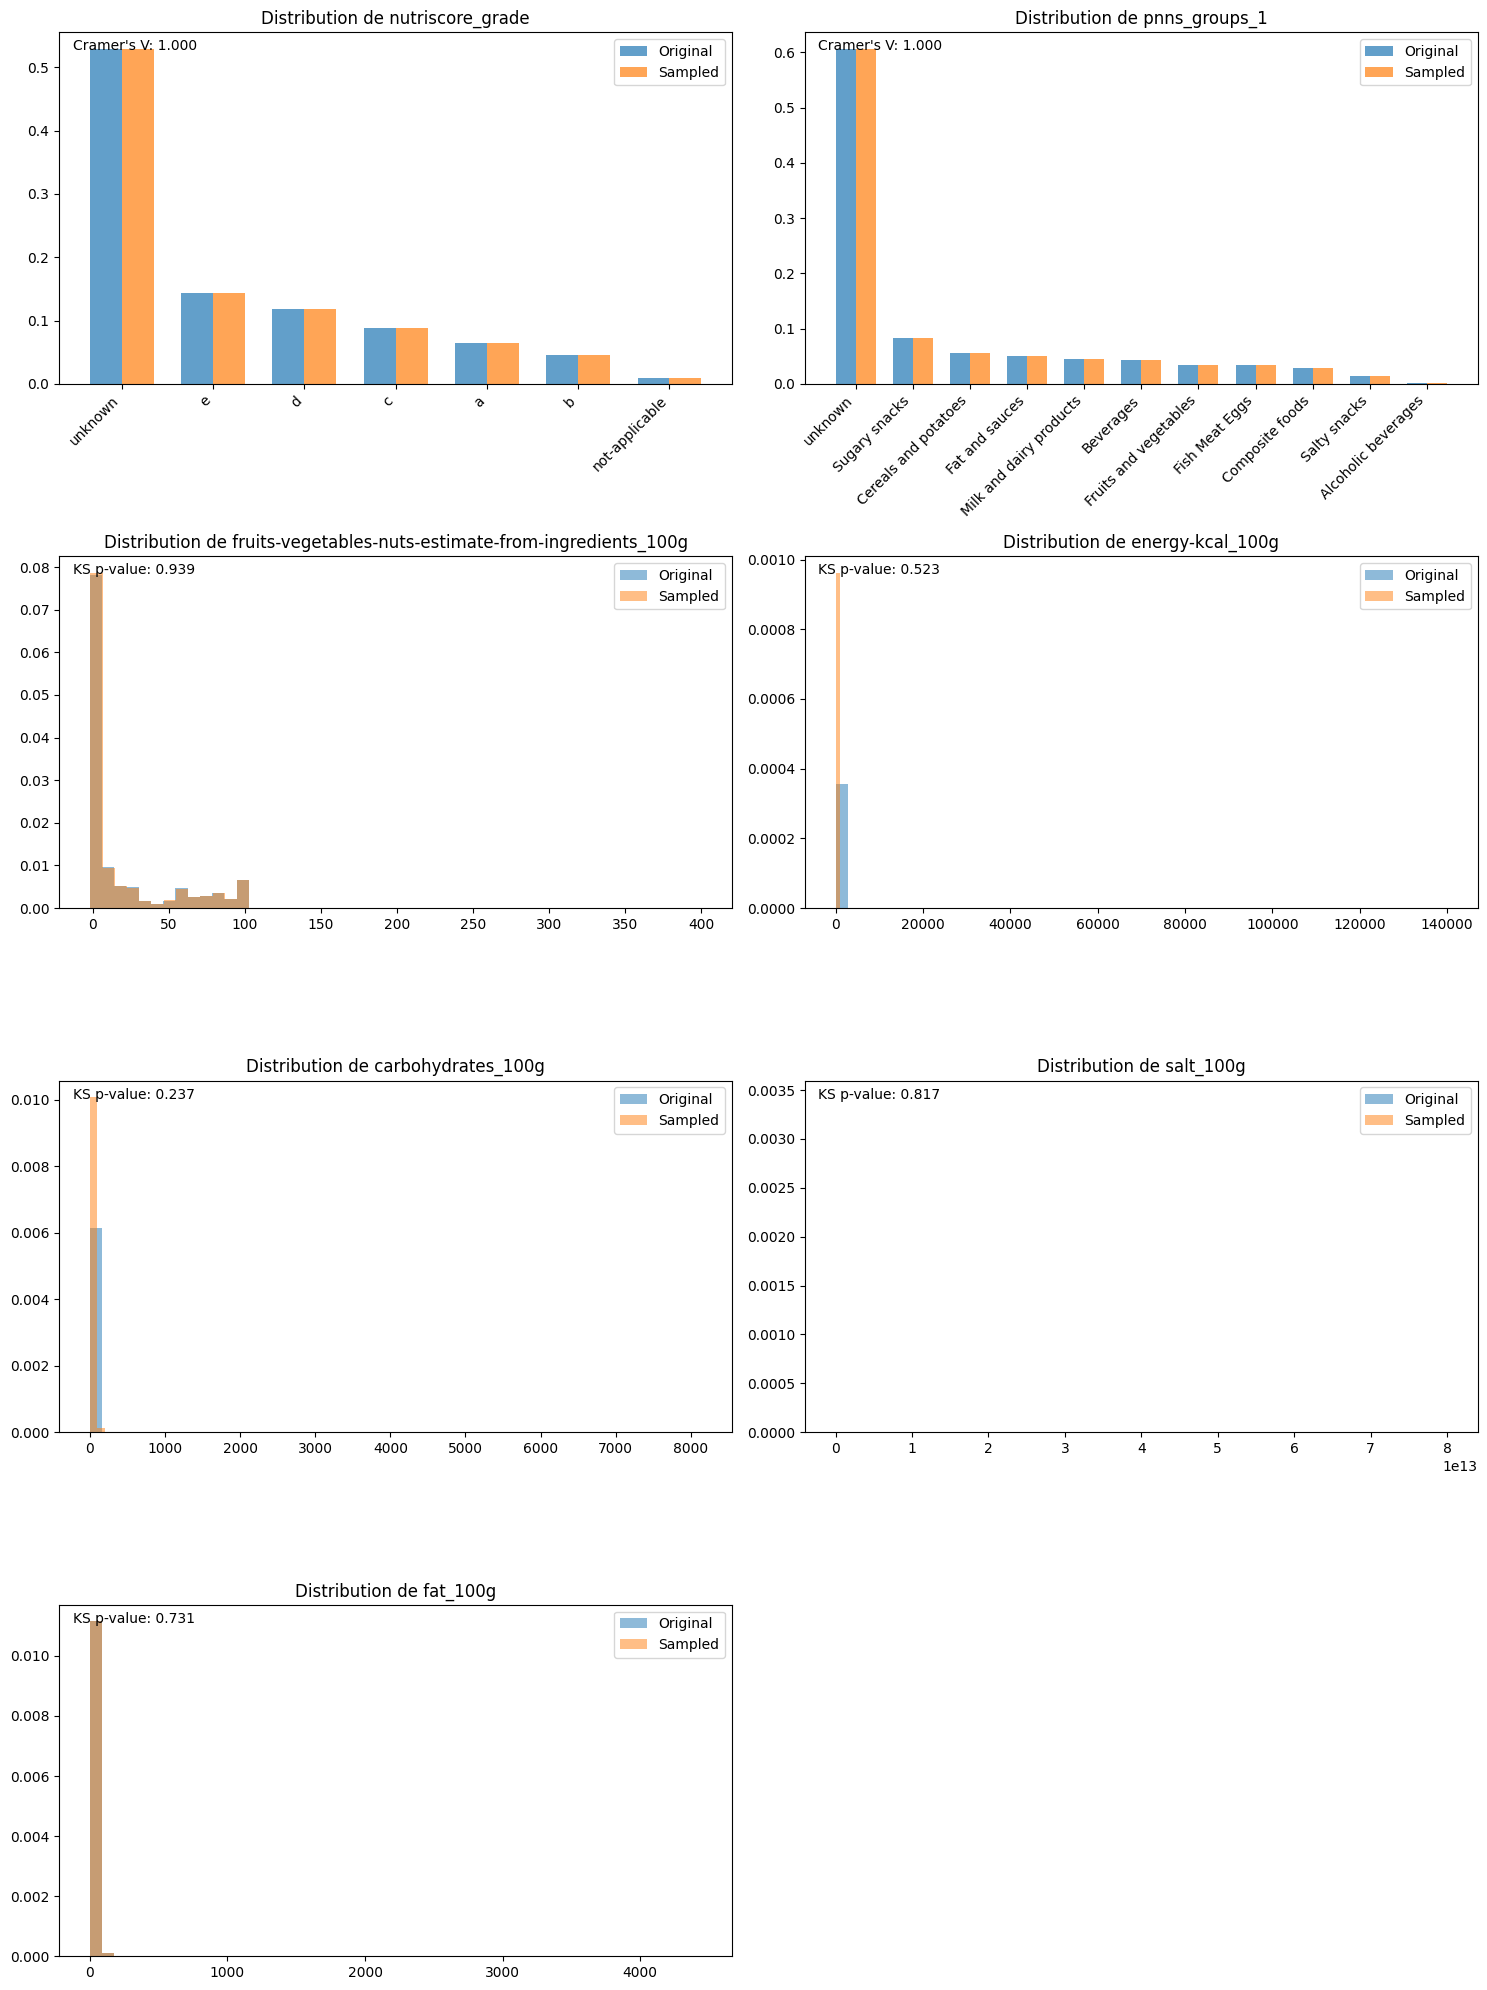

In [3]:
# Import the smart sampling function
from scripts.features.smart_sampling import smart_sample

# Apply smart sampling on filtered dataset instead of original
sample, metrics = smart_sample(df_filtered)

=== Résumé du nettoyage ===
Dimensions initiales: 124,978 lignes, 15 colonnes
Dimensions finales: 93,770 lignes, 9 colonnes

Valeurs manquantes:
  Avant: 273,359 cellules (14.6% du total)
  Après: 23,416 cellules (2.8% du total)

=== Colonnes problématiques ===

High Missing:

High Unique:
  - code: 100.00%

Constant:
  - code

Potential Errors:

=== Modifications effectuées ===
Colonnes ajoutées: Aucune
Colonnes supprimées: last_image_t, fruits-vegetables-nuts-estimate-from-ingredients_100g, salt_100g, saturated-fat_100g, created_t, last_modified_t


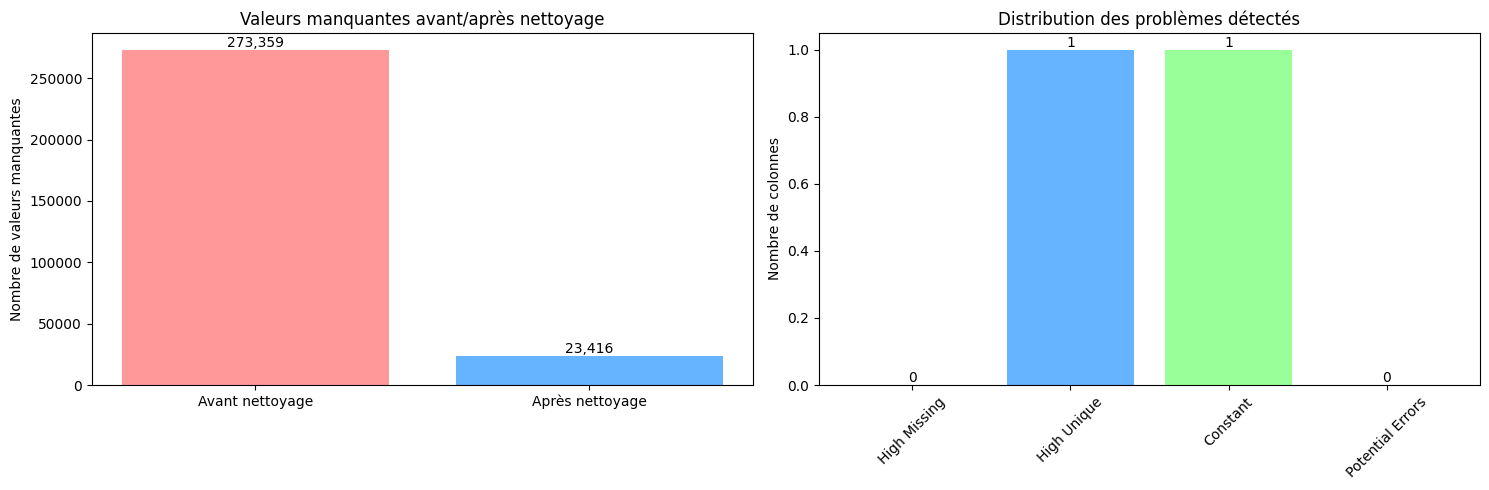

In [4]:
from scripts.data.clean_dataset import display_cleaning_summary, process_and_analyze_dataset


df_clean, info = process_and_analyze_dataset(sample)
display_cleaning_summary(info)

In [5]:
from scripts.categorical_encoder import encode_categorical_features

encodings_info = encode_categorical_features(df_clean)

Chargement des données...

Colonnes catégorielles identifiées (3):
['nutriscore_grade', 'pnns_groups_1', 'fat_category']

Traitement de la colonne : nutriscore_grade
Erreur lors du traitement de la colonne nutriscore_grade: Cannot setitem on a Categorical with a new category (Unknown), set the categories first

Traitement de la colonne : pnns_groups_1
Erreur lors du traitement de la colonne pnns_groups_1: Cannot setitem on a Categorical with a new category (Unknown), set the categories first

Traitement de la colonne : fat_category
Erreur lors du traitement de la colonne fat_category: Cannot setitem on a Categorical with a new category (Unknown), set the categories first

Création des visualisations...

Encodage terminé ! Fichiers sauvegardés dans 'encoded_features_auto'
